# Data Understanding



In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/aprabowo/indonesia-tourism-destination")

100%|██████████| 158k/158k [00:00<00:00, 15.7MB/s]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium


In [ ]:
data_rating = pd.read_csv('/content/indonesia-tourism-destination/tourism_rating.csv')
data_tourism = pd.read_csv('indonesia-tourism-destination/tourism_with_id.csv')
data_user = pd.read_csv('indonesia-tourism-destination/user.csv')
data_package = pd.read_csv('indonesia-tourism-destination/package_tourism.csv')

# Data Tourist View

In [ ]:
data_tourism

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,433,Museum Mpu Tantular,Museum Negeri Mpu Tantular adalah sebuah museu...,Budaya,Surabaya,2000,4.4,45.0,"{'lat': -7.4338593, 'lng': 112.7199058}",-7.433859,112.719906,NaN,433
433,434,Taman Bungkul,Taman Bungkul adalah taman wisata kota yang te...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.291346799999999, 'lng': 112.7398218}",-7.291347,112.739822,NaN,434
434,435,Taman Air Mancur Menari Kenjeran,Air mancur menari atau dancing fountain juga a...,Taman Hiburan,Surabaya,0,4.4,45.0,"{'lat': -7.2752955, 'lng': 112.7549381}",-7.275296,112.754938,NaN,435
435,436,Taman Flora Bratang Surabaya,Taman Flora adalah salah satu taman kota di Su...,Taman Hiburan,Surabaya,0,4.6,NaN,"{'lat': -7.294330299999999, 'lng': 112.7617534}",-7.294330,112.761753,NaN,436


In [ ]:
data_tourism = data_tourism.drop(['Unnamed: 11','Unnamed: 12'],axis=1)

In [ ]:
data_tourism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 37.7+ KB


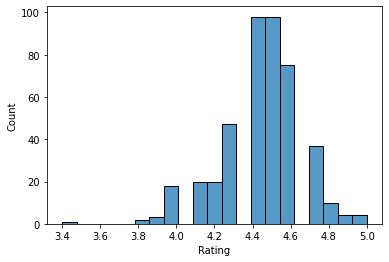

In [ ]:
sns.histplot(data_tourism.Rating)

In [ ]:
color = []
for i in data_tourism.Rating.values:
  c =''
  if(i>4.5):
    c='green'
  elif(i>3.5):
    c = 'orange'
  else:
    c ='red'
  color.append(c)

In [ ]:
map = folium.Map(location = [-6.175392,106.827153	],zoom_start = 5,prefer_canvas=True)

In [ ]:
latitude = list(data_tourism.Lat)
longitude = list(data_tourism.Long)
label = list(data_tourism.Place_Name)
for lat,long , label,c in zip(latitude,longitude,label,color):
  map.add_child(folium.Marker(location=[lat,long],popup=label,icon=folium.Icon(color=c)))


In [ ]:
map

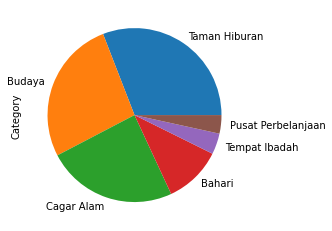

In [ ]:
data_tourism.Category.value_counts().plot.pie()

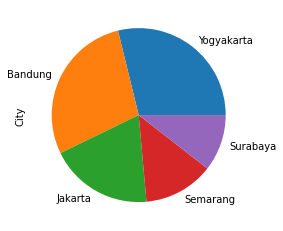

In [ ]:
data_tourism.City.value_counts().plot.pie()

# Data Use View


In [ ]:
data_user

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20
...,...,...,...
295,296,"Lampung, Sumatera Selatan",31
296,297,"Palembang, Sumatera Selatan",39
297,298,"Bogor, Jawa Barat",38
298,299,"Sragen, Jawa Tengah",27


In [ ]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


[]

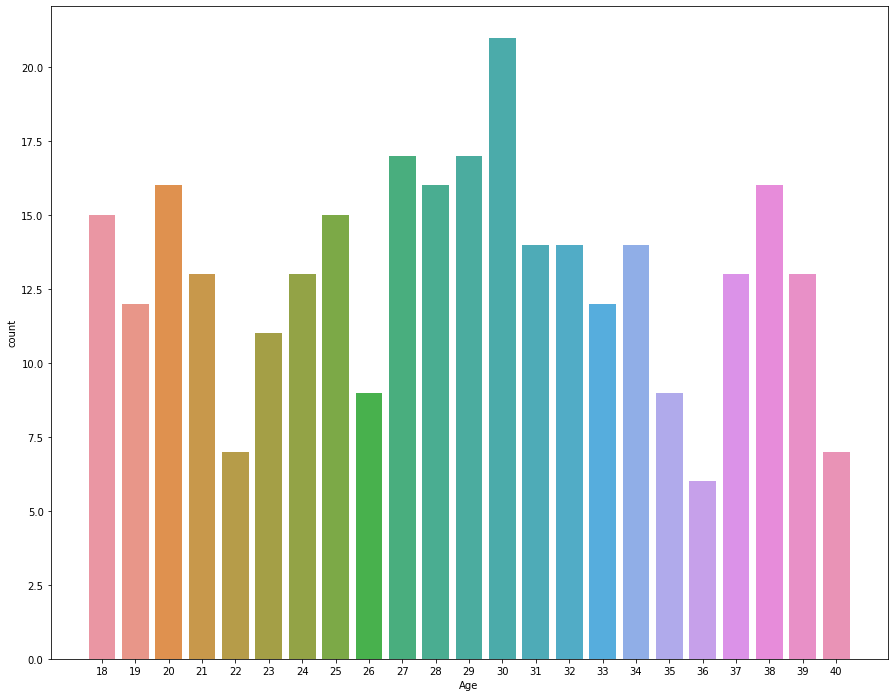

In [ ]:
plt.figure(figsize=(15,12))
sns.countplot(x='Age',data= data_user)
plt.plot()

[]

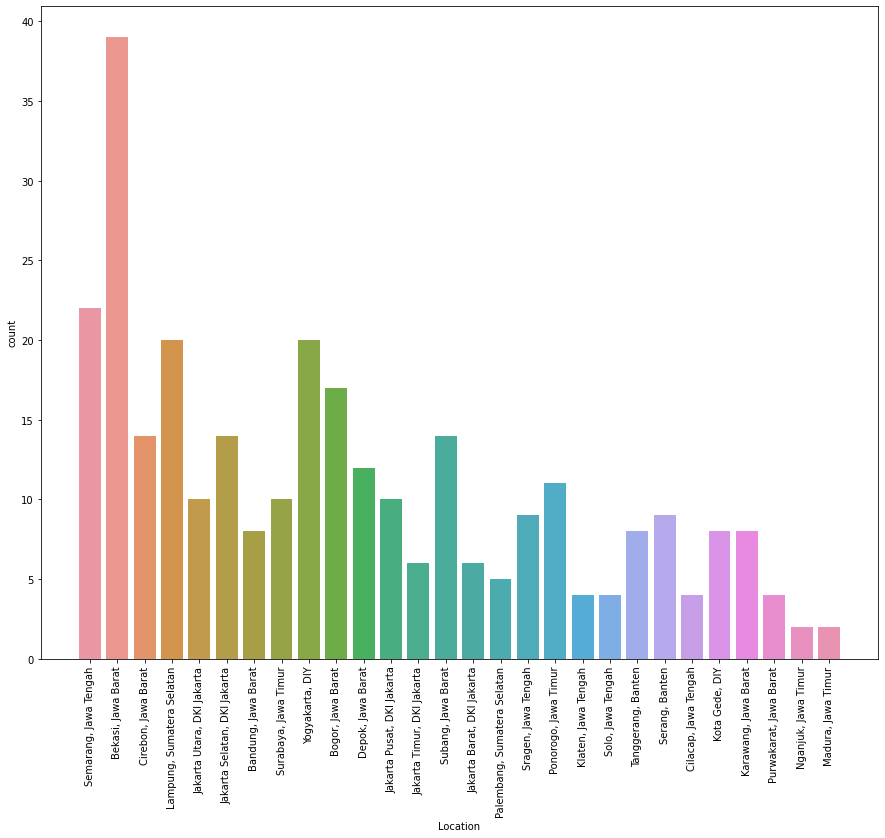

In [ ]:
plt.figure(figsize=(15,12))
x = sns.countplot(x='Location',data= data_user)
x.set_xticklabels(x.get_xticklabels(),rotation = 90)
plt.plot()

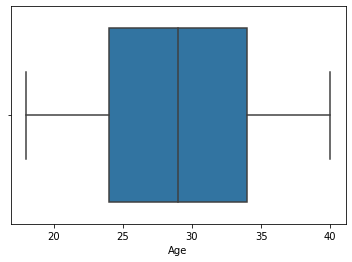

In [ ]:
sns.boxplot(x=data_user['Age'])

# Package Data View

In [ ]:
data_package

,Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5
0,1,Jakarta,Pasar Tanah Abang,Taman Ayodya,Museum Tekstil,NaN,NaN
1,2,Jakarta,Pasar Tanah Abang,Pasar Taman Puring,Pasar Petak Sembilan,NaN,NaN
2,3,Jakarta,Perpustakaan Nasional,Monas,Masjid Istiqlal,NaN,NaN
3,4,Jakarta,Pulau Tidung,Pulau Bidadari,Pulau Pari,Pulau Pramuka,Pulau Pelangi
4,5,Jakarta,Museum Satria Mandala,Museum Wayang,Museum Bahari Jakarta,Museum Macan (Modern and Contemporary Art in N...,NaN
...,...,...,...,...,...,...,...
95,96,Surabaya,Ekowisata Mangrove Wonorejo,Taman Harmoni Keputih,Taman Kunang-Kunang,Taman Ekspresi Dan Perpustakaan,Museum De Javasche Bank
96,97,Surabaya,Ciputra Waterpark,Kenjeran Park,Kebun Binatang Surabaya,Food Junction Grand Pakuwon,| Atlantis Land Surabaya
97,98,Surabaya,Museum Kesehatan Dr. Adhyatma,Patung Buddha Empat Rupa,Taman Hiburan Rakyat,Taman Bungkul,Taman Flora Bratang Surabaya
98,99,Surabaya,Taman Ekspresi Dan Perpustakaan,Museum De Javasche Bank,Surabaya Museum (Gedung Siola),Museum Mpu Tantular,Taman Air Mancur Menari Kenjeran


# Rating Data View


In [ ]:
data_rating

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


In [ ]:
data_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [ ]:
data_rating.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


In [ ]:
df = data_rating.merge(data_tourism,how='inner',on='Place_Id')

In [ ]:
df

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416
1,22,179,4,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416
2,40,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416
3,49,179,5,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416
4,74,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,240,140,3,Bendung Lepen,Bendung Lepen sendiri dulunya merupakan salura...,Taman Hiburan,Yogyakarta,0,4.6,60.0,"{'lat': -7.831666800000002, 'lng': 110.3945119}",-7.831667,110.394512
9996,247,140,4,Bendung Lepen,Bendung Lepen sendiri dulunya merupakan salura...,Taman Hiburan,Yogyakarta,0,4.6,60.0,"{'lat': -7.831666800000002, 'lng': 110.3945119}",-7.831667,110.394512
9997,261,140,4,Bendung Lepen,Bendung Lepen sendiri dulunya merupakan salura...,Taman Hiburan,Yogyakarta,0,4.6,60.0,"{'lat': -7.831666800000002, 'lng': 110.3945119}",-7.831667,110.394512
9998,267,140,3,Bendung Lepen,Bendung Lepen sendiri dulunya merupakan salura...,Taman Hiburan,Yogyakarta,0,4.6,60.0,"{'lat': -7.831666800000002, 'lng': 110.3945119}",-7.831667,110.394512


In [ ]:
df = df.drop(['Description','Coordinate','Lat','Long'],axis=1)

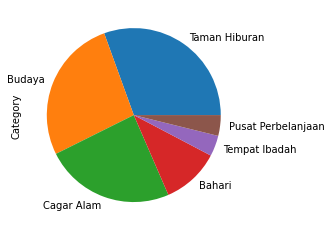

In [ ]:
df.Category.value_counts().plot.pie()

# Data Preparation


In [ ]:
df

,User_Id,Place_Id,Place_Ratings,Place_Name,Category,City,Price,Rating,Time_Minutes
0,1,179,3,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,90.0
1,22,179,4,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,90.0
2,40,179,3,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,90.0
3,49,179,5,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,90.0
4,74,179,3,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,90.0
...,...,...,...,...,...,...,...,...,...
9995,240,140,3,Bendung Lepen,Taman Hiburan,Yogyakarta,0,4.6,60.0
9996,247,140,4,Bendung Lepen,Taman Hiburan,Yogyakarta,0,4.6,60.0
9997,261,140,4,Bendung Lepen,Taman Hiburan,Yogyakarta,0,4.6,60.0
9998,267,140,3,Bendung Lepen,Taman Hiburan,Yogyakarta,0,4.6,60.0


In [ ]:
df_matrix = df.drop(['Place_Id','Category','City','Price','Rating','Time_Minutes'],axis=1)

In [ ]:
df_matrix

,User_Id,Place_Ratings,Place_Name
0,1,3,Candi Ratu Boko
1,22,4,Candi Ratu Boko
2,40,3,Candi Ratu Boko
3,49,5,Candi Ratu Boko
4,74,3,Candi Ratu Boko
...,...,...,...
9995,240,3,Bendung Lepen
9996,247,4,Bendung Lepen
9997,261,4,Bendung Lepen
9998,267,3,Bendung Lepen


In [ ]:
df_mat = df_matrix.pivot_table(index='Place_Name',columns='User_Id',values='Place_Ratings').fillna(0)

In [ ]:
df_mat

User_Id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300
Place_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Air Mancur Menari,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Air Terjun Kali Pancur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
Air Terjun Kedung Pedut,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Air Terjun Semirang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
Air Terjun Sri Gethuk,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wisata Kraton Jogja,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wisata Kuliner Pecenongan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
Wisata Lereng Kelir,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from scipy.sparse import csr_matrix

place_features = csr_matrix(df_mat.values)

In [ ]:
place_features

<437x300 sparse matrix of type '<class 'numpy.float64'>'
	with 9597 stored elements in Compressed Sparse Row format>

# Modelling

## Collaborative Filtering Model



In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
 

cosine_sim = cosine_similarity(place_features) 
cosine_sim

array([[1.        , 0.        , 0.09696402, ..., 0.07610768, 0.        ,
        0.        ],
       [0.        , 1.        , 0.04109129, ..., 0.11490065, 0.04182324,
        0.19670275],
       [0.09696402, 0.04109129, 1.        , ..., 0.06758258, 0.10147379,
        0.01871572],
       ...,
       [0.07610768, 0.11490065, 0.06758258, ..., 1.        , 0.05517244,
        0.02616672],
       [0.        , 0.04182324, 0.10147379, ..., 0.05517244, 1.        ,
        0.        ],
       [0.        , 0.19670275, 0.01871572, ..., 0.02616672, 0.        ,
        1.        ]])

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=data_tourism['Place_Name'], columns=data_tourism['Place_Name'])
print('Shape:', cosine_sim_df.shape)
 

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (437, 437)


Place_Name,Grojogan Watu Purbo Bangunrejo,Monumen Serangan Umum 1 Maret,Taman Kasmaran,Pantai Siung,Waterboom PIK (Pantai Indah Kapuk)
Place_Name,,,,,
Curug Cimahi,0.051398,0.000000,0.000000,0.173678,0.030010
Roemah Seni Sarasvati,0.054227,0.198271,0.052140,0.000000,0.079155
Air Terjun Kali Pancur,0.000000,0.088108,0.144813,0.000000,0.000000
Museum Mpu Tantular,0.019992,0.058476,0.000000,0.083708,0.070035
Gereja Perawan Maria Tak Berdosa Surabaya,0.127351,0.055876,0.011020,0.022452,0.000000
Pasar Tanah Abang,0.016138,0.073757,0.058188,0.000000,0.000000
Pecinan Glodok,0.028684,0.087396,0.115833,0.161190,0.078504
Studio Alam Gamplong,0.000000,0.135402,0.265210,0.067540,0.000000
Pulau Pramuka,0.045147,0.013756,0.016278,0.000000,0.065899


In [ ]:
vi = df.User_Id.sample(1).iloc[0]
vi


175

***Recommendation testing***

In [ ]:
def recommendation (user):
  extra=df[(df['User_Id'] == user) & (df['Place_Ratings']==df['Place_Ratings'].max())].sort_values(by='Place_Ratings',ascending=False)
  extra = extra.Place_Name.values
  count = 5
  items=data_tourism[['Place_Name','Category','City','Rating','Price','Time_Minutes']]
  new_rec1 = pd.DataFrame()
  for j,i in enumerate(extra):
    index = cosine_sim_df.loc[:,i].to_numpy().argpartition(range(-1, -count, -1))
    closest = cosine_sim_df.columns[index[-1:-(count+2):-1]]
    closest = closest.drop(i, errors='ignore')
    new_rec = pd.DataFrame(closest).merge(items).head(count)
    new_rec1 = pd.concat([new_rec1,new_rec])

  return new_rec1

In [ ]:
test = recommendation(vi)

In [ ]:
test

,Place_Name,Category,City,Rating,Price,Time_Minutes
0,Pasar Kebon Empring Bintaran,Pusat Perbelanjaan,Yogyakarta,4.4,0,NaN
1,Museum Bahari Jakarta,Budaya,Jakarta,4.4,2000,120.0
2,Candi Ratu Boko,Budaya,Yogyakarta,4.6,75000,90.0
3,Pura Giri Natha,Budaya,Semarang,4.7,20000,NaN
4,Ciputra Waterpark,Taman Hiburan,Surabaya,4.3,95000,90.0
0,Museum Gunung Merapi,Budaya,Yogyakarta,4.4,10000,60.0
1,Watu Goyang,Budaya,Yogyakarta,4.4,2500,45.0
2,Taman Lansia,Taman Hiburan,Bandung,4.4,0,NaN
3,Museum Nike Ardilla,Budaya,Bandung,4.6,0,NaN
4,Taman Impian Jaya Ancol,Taman Hiburan,Jakarta,4.5,25000,10.0


## Content Based Model


In [ ]:
category=[]
place_tourism = data_tourism.copy()
place_tourism = place_tourism[['Place_Name','Category']]
category = list(data_tourism.Category.unique())


for x in category:
    place_tourism[x] = 0
for i in range(len(place_tourism.Category)):
        x = place_tourism.Category[i]
        place_tourism[x][i]=1
place_tourism = place_tourism.set_index('Place_Name')
place_tourism

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Category,Budaya,Taman Hiburan,Cagar Alam,Bahari,Pusat Perbelanjaan,Tempat Ibadah
Place_Name,,,,,,,
Monumen Nasional,Budaya,1,0,0,0,0,0
Kota Tua,Budaya,1,0,0,0,0,0
Dunia Fantasi,Taman Hiburan,0,1,0,0,0,0
Taman Mini Indonesia Indah (TMII),Taman Hiburan,0,1,0,0,0,0
Atlantis Water Adventure,Taman Hiburan,0,1,0,0,0,0
...,...,...,...,...,...,...,...
Museum Mpu Tantular,Budaya,1,0,0,0,0,0
Taman Bungkul,Taman Hiburan,0,1,0,0,0,0
Taman Air Mancur Menari Kenjeran,Taman Hiburan,0,1,0,0,0,0


In [ ]:
place_tourism = place_tourism.drop('Category',axis=1)
place_tourism = csr_matrix(place_tourism.values)


***Recommendation testing***

In [ ]:
def model(model,place):
  model_df = model(place_tourism)
  model_df = pd.DataFrame(model_df, index=data_tourism['Place_Name'], columns=data_tourism['Place_Name'])
  count = 5
  items=data_tourism[['Place_Name','Category','City','Rating','Price','Time_Minutes']]
  index = model_df.loc[:,place].to_numpy().argpartition(range(-1, -count, -1))
  closest = model_df.columns[index[-1:-(count+2):-1]]
  closest = closest.drop(place, errors='ignore')
  new_rec = pd.DataFrame(closest).merge(items).head(count)
  cat = data_tourism.Category[data_tourism['Place_Name']== place].iloc[0]
  new_rec = new_rec.style.set_caption("Recommendation for {} (Category : {} )".format(place,cat))
  # print("Recommendation for {} (Category : {} )".format(place,cat))
  return new_rec


### Using sigmoid kernel

In [ ]:
from sklearn.metrics.pairwise import sigmoid_kernel

# sigmoid_model = sigmoid_kernel(place_tourism)
# sigmoid_model
place = data_tourism.Place_Name.sample(1).iloc[0]

test = model(sigmoid_kernel,place)
test

,Place_Name,Category,City,Rating,Price,Time_Minutes
0,Dago Dreampark,Taman Hiburan,Bandung,4.200000,40000,150.000000
1,Panghegar Waterboom Bandung,Taman Hiburan,Bandung,4.300000,75000,nan
2,Alive Museum Ancol,Taman Hiburan,Jakarta,4.300000,200000,nan
3,Glamping Lakeside Rancabali,Taman Hiburan,Bandung,4.400000,30000,nan
4,Taman Miniatur Kereta Api,Taman Hiburan,Bandung,4.400000,15000,nan


### Using Euclidean Distance

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
place = data_tourism.Place_Name.sample(1).iloc[0]
test = model(euclidean_distances,place)
test

,Place_Name,Category,City,Rating,Price,Time_Minutes
0,Gereja Perawan Maria Tak Berdosa Surabaya,Tempat Ibadah,Surabaya,4.800000,10000,nan
1,Pantai Sepanjang,Bahari,Yogyakarta,4.400000,10000,120.000000
2,Pantai Krakal,Bahari,Yogyakarta,4.500000,10000,nan
3,Jogja Bay Pirates Adventure Waterpark,Taman Hiburan,Yogyakarta,4.400000,150000,nan
4,Pantai Sundak,Bahari,Yogyakarta,4.500000,5000,nan


### Using Cosine Similarity

In [ ]:
place = data_tourism.Place_Name.sample(1).iloc[0]
test = model(cosine_similarity,place)
test

,Place_Name,Category,City,Rating,Price,Time_Minutes
0,Dago Dreampark,Taman Hiburan,Bandung,4.200000,40000,150.000000
1,Panghegar Waterboom Bandung,Taman Hiburan,Bandung,4.300000,75000,nan
2,Alive Museum Ancol,Taman Hiburan,Jakarta,4.300000,200000,nan
3,Glamping Lakeside Rancabali,Taman Hiburan,Bandung,4.400000,30000,nan
4,Taman Miniatur Kereta Api,Taman Hiburan,Bandung,4.400000,15000,nan
